## Image Denoising Using Fully Symmetric Convolution-Deconvolution Network

### Setup

In [1]:
import numpy as np
import pandas as pd

import skimage
from skimage.io import imread

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import os
import cv2
import random

### Getting Training and Testing Dataset

In [2]:
# Loading Mnist dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
type(x_train)

numpy.ndarray

In [4]:
y_train = x_train.copy()
y_test = x_test.copy()

#### Noise Function

In [5]:
def add_noise(img):
 
    # Getting the dimensions of the image
    row , col = img.shape
     
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(12, 20)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to white
        img[y_coord][x_coord] = 255
         
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(12 , 20)
    for i in range(number_of_pixels):
       
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
         
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
         
        # Color that pixel to black
        img[y_coord][x_coord] = 0
         
    return img

#### Noising the Training and Testing Data

In [6]:
for i in x_train:
    x = add_noise(i)

for i in x_test:
    x = add_noise(i)

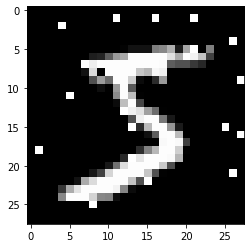

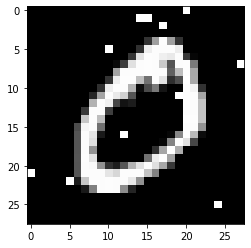

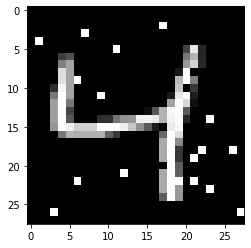

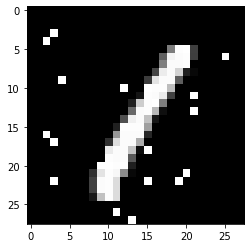

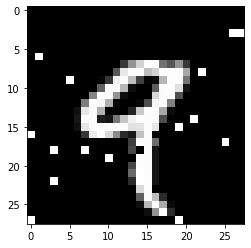

In [7]:
# Train Image view check
for i in range(5):
    plt.imshow(x_train[i], cmap='gray')
    plt.show()

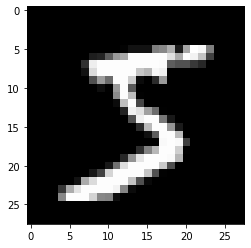

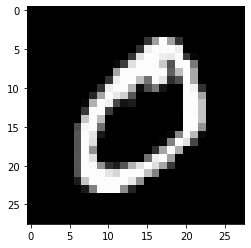

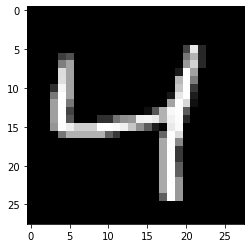

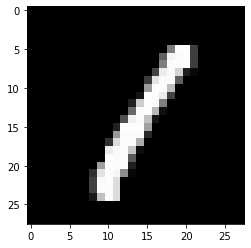

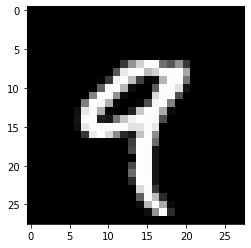

In [8]:
for i in range(5):
    plt.imshow(y_train[i], cmap='gray')
    plt.show()

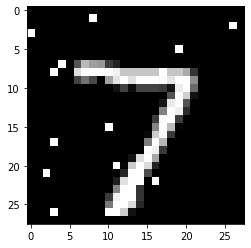

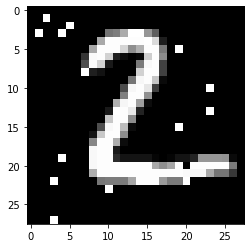

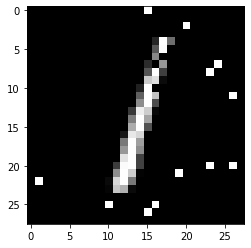

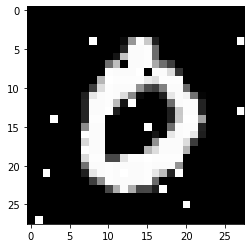

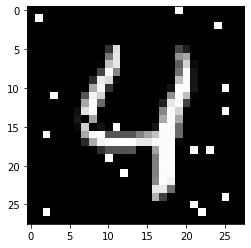

In [9]:
for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.show()

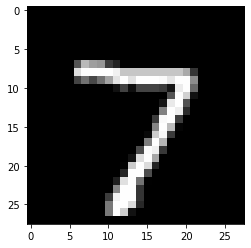

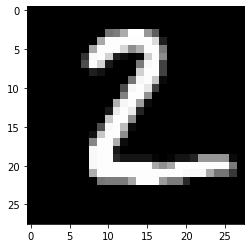

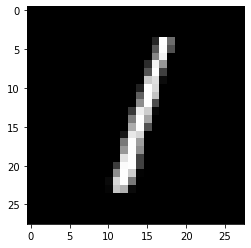

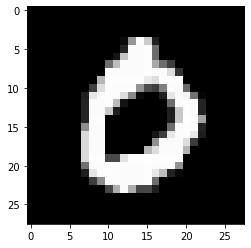

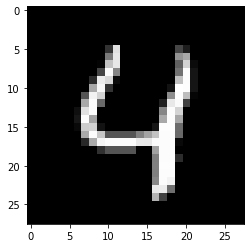

In [10]:
for i in range(5):
    plt.imshow(y_test[i], cmap='gray')
    plt.show()

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
# Make all images to have the shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
y_train = np.expand_dims(y_train, -1)
x_test = np.expand_dims(x_test, -1)
y_test = np.expand_dims(y_test, -1)

In [13]:
x_train.shape

(60000, 28, 28, 1)

In [14]:
# Normalizing the train and test data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test  = tf.keras.utils.normalize(x_test,  axis=1)
y_train = tf.keras.utils.normalize(y_train, axis=1)
y_test  = tf.keras.utils.normalize(y_test,  axis=1)

### Model

In [15]:
# Fully Symmetric convolutional-deconvolutional Network 
# HeNoraml initializer for RELU
fscn_model = tf.keras.models.Sequential([
        # keras.Input(shape=(28,28,1)),

        layers.Conv2D(8, strides=(1,1), kernel_size=(3, 3), activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(seed=None)),
        layers.Conv2DTranspose(8, strides=(1,1), kernel_size=(3, 3), activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(seed=None)),

        layers.Conv2D(8, strides=(1,1), kernel_size=(3, 3), activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(seed=None)),
        layers.Conv2DTranspose(8, strides=(1,1), kernel_size=(3, 3), activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(seed=None)),

        layers.Conv2D(8, strides=(1,1), kernel_size=(3, 3), activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(seed=None)),
        layers.Conv2DTranspose(8, strides=(1,1), kernel_size=(3, 3), activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(seed=None)),

        layers.Conv2D(8, strides=(1,1), kernel_size=(3, 3), activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(seed=None)),
        layers.Conv2DTranspose(8, strides=(1,1), kernel_size=(3, 3), activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(seed=None)),

        layers.Conv2D(1, strides=(1,1), kernel_size=(3, 3), activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(seed=None)),
        layers.Conv2DTranspose(1, strides=(1,1), kernel_size=(3, 3), activation="relu", kernel_initializer=tf.keras.initializers.HeNormal(seed=None))
        
])


In [16]:
# Model Compile
fscn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [17]:
# Training the Model, only 10 epochs because after 10 epochs the the val_loss didn't have a drastic decrease and was only fluctuating
# So in order to avoid overfitting no more than 10 epochs
fscn_model.fit(x_train, y_train, epochs=2, validation_split=0.25, batch_size=150)

Epoch 1/2
300/300 [==============================] - 47s 156ms/step - loss: 0.1238 - accuracy: 0.8086 - val_loss: 0.1132 - val_accuracy: 0.8093
Epoch 2/2
300/300 [==============================] - 46s 154ms/step - loss: 0.1116 - accuracy: 0.8086 - val_loss: 0.1099 - val_accuracy: 0.8093


In [18]:
fscn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (150, 26, 26, 8)          80        
                                                                 
 conv2d_transpose (Conv2DTra  (150, 28, 28, 8)         584       
 nspose)                                                         
                                                                 
 conv2d_1 (Conv2D)           (150, 26, 26, 8)          584       
                                                                 
 conv2d_transpose_1 (Conv2DT  (150, 28, 28, 8)         584       
 ranspose)                                                       
                                                                 
 conv2d_2 (Conv2D)           (150, 26, 26, 8)          584       
                                                                 
 conv2d_transpose_2 (Conv2DT  (150, 28, 28, 8)         5

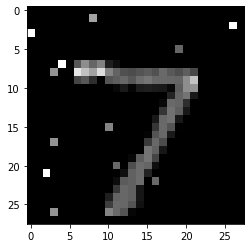

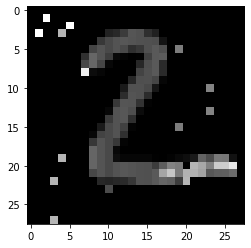

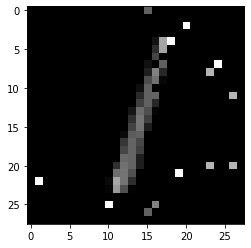

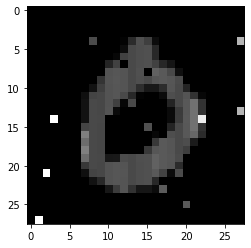

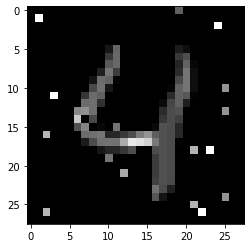

In [19]:
for i in range(5):
    plt.imshow(x_test[i], cmap='gray')
    plt.show()

In [20]:
z = fscn_model.predict(x_test)

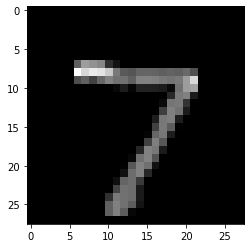

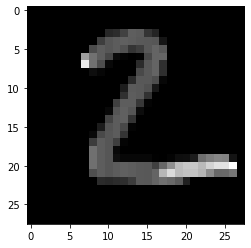

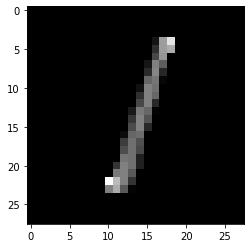

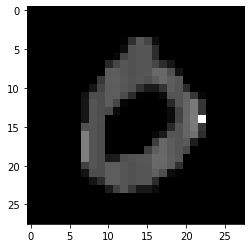

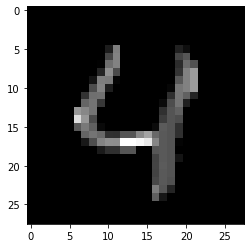

In [21]:
for i in range(5):
    plt.imshow(y_test[i], cmap='gray')
    plt.show()

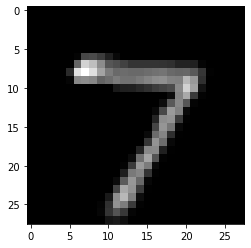

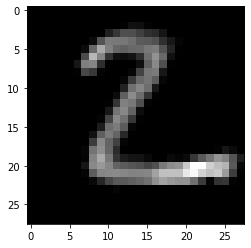

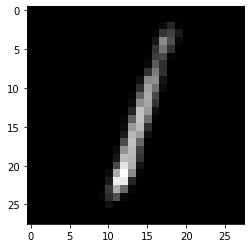

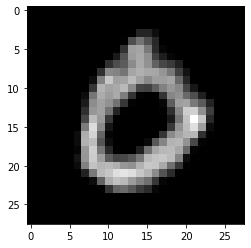

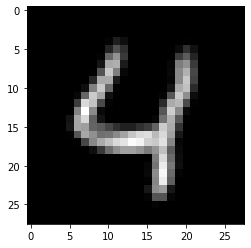

In [24]:
for i in range(5):
    plt.imshow(z[i], cmap='gray')
    plt.show()